# CUWALID TRAINING

## CUWALID: Python basics - Raster data

To help you understand the model, it is useful to force the model with datasets that are simple to interpret.

Here you will find a set of functions that can help you to create synthetic raster datasets that can be used for model testing. DRYP uses *.ASC and *.tif as raster data for model parameters.

Below you can find a set of examples of synthetic datasets:
1. Create raster files of model paramters
2. Create synthetic raster files of constant head boundary conditions

This notebook will help you to create **test** raster files to prepare test models for DRYP

In [1]:
import sys
#sys.modules[_name_]._dict_clear()
import os
import numpy as np
from landlab import RasterModelGrid
from landlab.io import read_esri_ascii
from landlab.io import write_esri_ascii

In [2]:
import matplotlib.pyplot as plt

In [3]:
def lakes_surface(n=200, scale=10, offset=0):
    # Make the X, Y meshgrid instead of np.tile
    x = np.linspace(-2*np.pi, 2*np.pi, n)
    y = np.linspace(-2*np.pi, 2*np.pi, n)
    xs, ys = np.meshgrid(x, y) 
    # Z evaluation
    amp = (np.sin(xs)+np.cos(ys))*0.5
    #amp[amp > 0.5] = 1
    #amp[amp <= 0.5] = 0
    amp = amp*scale + offset    
    return amp

def lakes_long_surface(n=200, scale=10, offset=0):
    # Make the X, Y meshgrid instead of np.tile
    x = np.linspace(-0*np.pi, 2*np.pi, n)
    y = np.linspace(-0*np.pi, 2*np.pi, n)
    xs, ys = np.meshgrid(x, y) 
    # Z evaluation
    amp = (np.sin(xs+ys*0))*0.5
    #amp[amp > 0.5] = 1
    #amp[amp <= 0.5] = 0
    amp = amp*scale + offset    
    return amp
def lakes_dlong_surface(n=200, scale=10, offset=0):
    # Make the X, Y meshgrid instead of np.tile
    x = np.linspace(-0.5*np.pi, 1.5*np.pi, n)
    y = np.linspace(-0.*np.pi, 1.5*np.pi, n)
    xs, ys = np.meshgrid(x, y) 
    # Z evaluation
    amp = (np.sin(xs+ys)+np.cos(ys))*0.5
    #amp[amp > 0.5] = 1
    #amp[amp <= 0.5] = 0
    amp = amp*scale + offset    
    return amp
def add_slope(array, slopex=1.0, slopey=1.0):
    n=np.shape(array)[0]
    x = np.linspace(0, n, n)
    xs, ys = np.meshgrid(x, x)
    array = array+(xs*slopex+ys*slopey)*0.5
    return array

In [4]:
def plot_surface(b):
    fig, ax = plt.subplots()
    im = plt.imshow(b)
    plt.contour(b, colors="k")
    fig.colorbar(im)
    
def plot_profile(dem, bathymetry=None, rows=15):	
	fig, ax = plt.subplots()#3, 5, sharex=True, sharey=True)
	#fig.set_size_inches(10., 7.2)
	for irow in rows:
		ax.plot(dem[irow], 'k')
		if bathymetry is not None:
			ax.plot(dem[irow]-bathymetry[irow], 'r')

In [5]:
def save_raster(array, path_output, dx=1000):
    row, col =np.shape(array)
    rg = RasterModelGrid((row, col), dx)
    rg.at_node.clear() 
    #rg,at_node["var"]
    rg.add_field("var", array, at="node")
    #out_filename_sigma_ks = filename_out+'_sigma_ks.txt'
    os.remove(path_output) if os.path.exists(path_output) else None
    files = write_esri_ascii(path_output, rg,'var')
    pass

### Create a raster grid for lakes

Create a topographical surface with depresions representing lakes

In [6]:
#b = lakes_surface(n=30, scale=100, offset=200)
#b = lakes_long_surface(n=30, scale=100, offset=200)
b = lakes_dlong_surface(n=30, scale=100, offset=200)

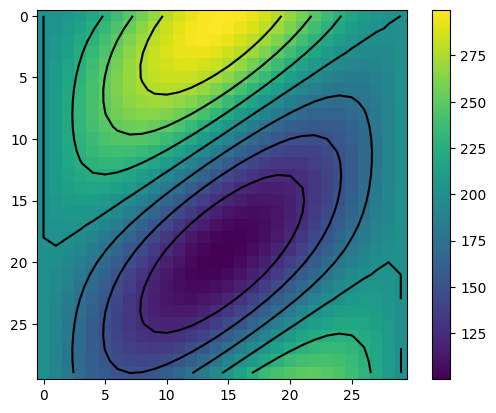

In [7]:
plot_surface(b)

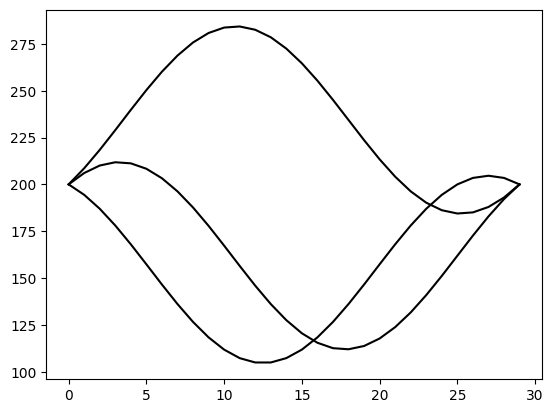

In [8]:
plot_profile(b, bathymetry=None, rows=[5, 15, 22])

#### Surface with lakes

Here you can create a surface elevation which will allows to include lakes in the model. Basically, you will flatten the lake are to latter add lake bathymetry. 

In [9]:
slopex = 2.0
slopey = 0.0
max_water_level = 160

In [10]:
surface = b.copy()
#surface[surface < 200] = 200
surface = add_slope(surface, slopex=slopex, slopey=slopey)
surface[surface < max_water_level] = max_water_level


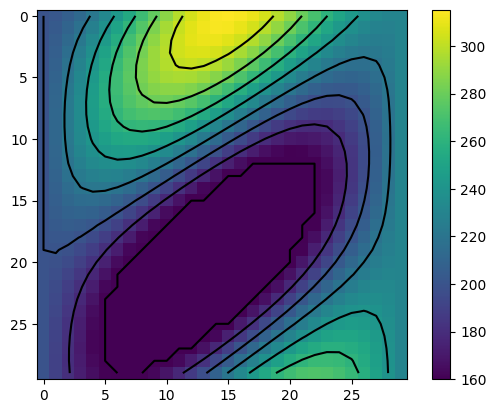

In [11]:
plot_surface(surface)

#### Lakes bathymetry

Create a lake bathymetry for running a test sample model

In [12]:
#bathymetry = 200 - b
bathymetry = max_water_level - add_slope(b, slopex=slopex, slopey=slopey)
bathymetry[bathymetry < 0] = 0.0

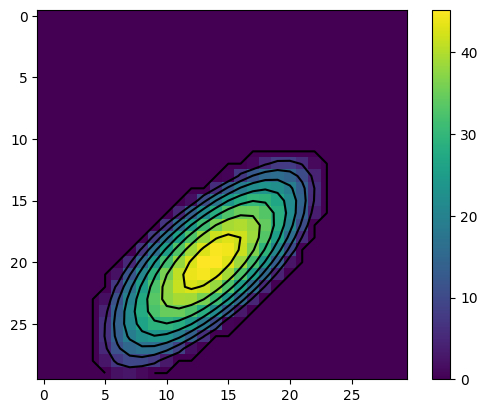

In [13]:
plot_surface(bathymetry)

##### plot profile

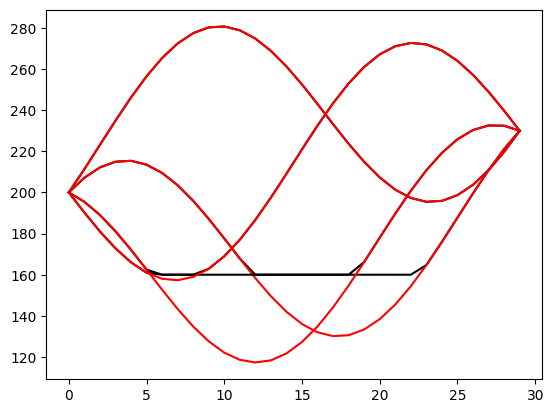

In [14]:
#plot_profile(surface, bathymetry=None, rows=[15, 22, 20])
plot_profile(surface, bathymetry=bathymetry, rows=[7, 15, 22, 29])
#plot_profile(b, bathymetry=None, rows=[15, 22])

#### Create an initial water table

Create a raster file representing inital condition for the water table

In [15]:
depth = 120
watertable = add_slope(b*0+depth, slopex=slopex, slopey=slopey)

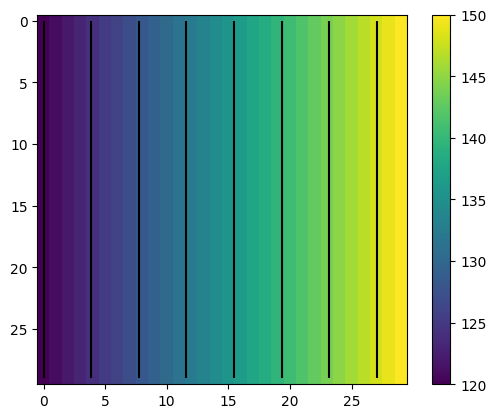

In [16]:
plot_surface(watertable)

#### Consatant head boundary

Create a constant head boundary condition file for running DRYP

In [17]:
chb = b*0-9999.0
chb[:,0] = depth

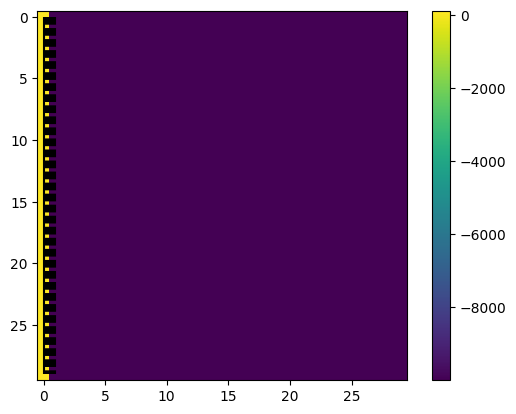

In [18]:
plot_surface(chb)

## Save raster files

Here, you can use this section to store raster dataset in you PC

In [19]:
folder = "C:/Users/Edisson/Documents/GitHub/CUWALID-Example/Examples/Python/"

In [20]:
fname = folder + "/mlakes_dem.asc"
save_raster(surface, fname, dx=1000.0)

C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\landlab\graph\graph.py:403: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return self.ds.dims["node"]
C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\landlab\graph\graph.py:490: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return self.ds.dims["link"]
C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\landlab\graph\graph.py:869: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names

In [21]:
fname = folder + "/mlakes_bathymetry.asc"
save_raster(bathymetry, fname, dx=1000.0)

In [22]:
fname = folder + "/mlakes_watertable.asc"
save_raster(watertable, fname, dx=1000.0)

In [23]:
fname = folder + "/mlakes_constant_head.asc"
save_raster(chb, fname, dx=1000.0)